In [2]:
import pandas as pd
import numpy as np
#시각화(고급)
import seaborn as sns
#시각화
import matplotlib.pyplot as plt
import plotly.graph_objects as ply
#한글 폰트
from matplotlib import font_manager, rc
plt.rc("font",family= "Malgun Gothic")
###마이너스 기호 사용 설정
plt.rcParams["axes.unicode_minus"]=False
#지도
import folium
# 운영체제를 확인하기 위한 라이브러리
import platform

In [67]:
pip install plotly

     ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
      --------------------------------------- 0.2/15.5 MB 14.3 MB/s eta 0:00:02
     - -------------------------------------- 0.5/15.5 MB 8.3 MB/s eta 0:00:02
     -- ------------------------------------- 1.0/15.5 MB 8.1 MB/s eta 0:00:02
     ---- ----------------------------------- 1.7/15.5 MB 9.8 MB/s eta 0:00:02
     ------ --------------------------------- 2.6/15.5 MB 11.8 MB/s eta 0:00:02
     -------- ------------------------------- 3.4/15.5 MB 12.7 MB/s eta 0:00:01
     ---------- ----------------------------- 4.3/15.5 MB 14.3 MB/s eta 0:00:01
     -------------- ------------------------- 5.7/15.5 MB 16.5 MB/s eta 0:00:01
     ----------------- ---------------------- 6.8/15.5 MB 16.7 MB/s eta 0:00:01
     ----------------- ---------------------- 6.9/15.5 MB 15.3 MB/s eta 0:00:01
     -------------------- ------------------- 7.9/15.5 MB 15.9 MB/s eta 0:00:01
     ----------------------- ---------------- 9.2/1

In [3]:
file_path = "./code_table.csv"
df1 = pd.read_csv(file_path,encoding="euc-kr")
df1

,코드유형,코드,코드명
0,공상구분코드,0,정상건
1,공상구분코드,1,공상건(공교공단분)
2,공상구분코드,3,광주민주유공자(30%감면)
3,공상구분코드,4,보훈(건강보험 또는 의료급여가입자)
4,공상구분코드,5,50%감면 보훈대상
...,...,...,...
34523,YR2_PPAYM_TP_CD,8,8
34524,YR2_PPAYM_TP_CD,10,10
34525,YR2_PPAYM_TP_CD,12,12
34526,YR2_PPAYM_TP_CD,2B,2B


In [4]:
file_path = "./age.csv"
df2 = pd.read_csv(file_path,encoding="euc-kr")
df2

,진료년도,성별,연령군,행위코드,환자수,명세서청구건수,의료행위총사용량,의료행위청구금액
0,2014,남,01_0~4세,10100,120206,148862,171013,1932557300
1,2014,남,01_0~4세,10200,70990,461589,528591,3712737040
2,2014,남,01_0~4세,10221,81,268,268,956760
3,2014,남,01_0~4세,11100,42,104,104,483900
4,2014,남,01_0~4세,11600,1,1,1,9370
...,...,...,...,...,...,...,...,...
169738,2014,여,18_85세이상,Z4200,2877,3685,84877,96759780
169739,2014,여,18_85세이상,Z4201,2244,8451,598027,1052527520
169740,2014,여,18_85세이상,Z7000,10081,36581,2139330,8621499900
169741,2014,여,18_85세이상,Z8000,2,2,7,69650


In [5]:
df2['행위코드']= df2['행위코드'].replace(code)

NameError: name 'code' is not defined

In [14]:
df2

,진료년도,성별,연령군,행위코드,환자수,명세서청구건수,의료행위총사용량,의료행위청구금액
0,2014,남,01_0~4세,내과,120206,148862,171013,1932557300
1,2014,남,01_0~4세,신경과,70990,461589,528591,3712737040
2,2014,남,01_0~4세,10221,81,268,268,956760
3,2014,남,01_0~4세,일반,42,104,104,483900
4,2014,남,01_0~4세,영상의학과,1,1,1,9370
...,...,...,...,...,...,...,...,...
169738,2014,여,18_85세이상,Z4200,2877,3685,84877,96759780
169739,2014,여,18_85세이상,Z4201,2244,8451,598027,1052527520
169740,2014,여,18_85세이상,Z7000,10081,36581,2139330,8621499900
169741,2014,여,18_85세이상,Z8000,2,2,7,69650


In [12]:
code = df1.set_index('코드')['코드명'].to_dict()
code

{'0': '접수완료',
 '1': '기본진료료',
 '3': '약품비',
 '4': '4',
 '5': '급여비용의 100분의 100을 본인부담',
 '6': '6',
 '7': '식약처장 허가사항외 등 투여로 불인정',
 '8': '8',
 '9': '관련자료 미제출로 불인정',
 '$         ': '해당사항없음',
 'B         ': 'B',
 'C         ': '정밀',
 'D         ': '소멸시효경과',
 'E         ': "심사불능코드 '38'",
 'F         ': '중.복잡도50%이상',
 'G         ': '비뇨기계(신장, 부신, 방광)',
 'H         ': '상단(H)',
 'J         ': 'DRG 세부내역',
 'N         ': '차상위.희귀대상자',
 '82300': '대구광역시약사회',
 '52300': '대구광역시치과의사회',
 '32600': '울산광역시의사회',
 '52101': '처방전교부번호_3일반오류',
 '53103': '수원시 치과의사회',
 '50000': '간호사',
 '92200': '인천광역시한의사회',
 '32201': '인천광역시계양구의사회',
 '53600': '전라남도치과의사회',
 '52203': '인천광역시부평구치과의사회',
 '52202': '처방전일련번호_3지급불능오류',
 '33802': '경남진해시의사회',
 '33801': '경남창원시의사회',
 '93801': '경남한의사회',
 '31100': '서울특별시의사회',
 '53700': '경북치과의사회',
 '53101': '처방전교부번호_4일반오류',
 '53102': '처방전교부번호_4지급불능오류',
 '33101': '안산시의사회',
 '52201': '처방전일련번호_3일반오류',
 '53201': '처방전일련번호_4일반오류',
 'A10       ': '병리학분야',
 'A20       ': '병리보고서-종양 조직학적 형태 기타',
 'AQ1       ': "

In [19]:
file_path = "./22대_질병.xlsx"
df3 = pd.read_excel(file_path)
df3

,질병22대분류별,2017,2018,2019,2020,2021
0,혈액 및 조혈기관의 질환과 면역기전을 침범한 특정 장애,592391,599806,624986,584585,715292
1,"내분비, 영양 및 대사질환",6265886,6699829,7168989,7370173,8196479
2,정신 및 행동장애,2802177,3021012,3223863,3317242,3622695
3,신경계의 질환,3160231,3281661,3472318,3362525,3638264
4,눈 및 눈부속기의 질환,14709542,14821744,15094386,13801877,14606479
5,귀 및 유양돌기의 질환,5738152,5727878,5778856,4908311,5178029
6,순환기계의 질환,8822926,9182517,9555798,9752328,10346369
7,호흡기계의 질환,31325862,32288227,31128992,22382532,19076580
8,소화기계의 질환,29201285,29759474,30550929,29223495,30612231
9,피부 및 피하조직의 질환,14396085,14412627,14581439,13951238,14182746


In [37]:
df3_trans = df3.T
df3_col = df3_trans.iloc[0]
df3_fin = df3_trans[1:]
df3_fin.columns = df3_col
df3_end= df3_fin.reset_index()
df3_end

질병22대분류별,index,혈액 및 조혈기관의 질환과 면역기전을 침범한 특정 장애,"내분비, 영양 및 대사질환",정신 및 행동장애,신경계의 질환,눈 및 눈부속기의 질환,귀 및 유양돌기의 질환,순환기계의 질환,호흡기계의 질환,소화기계의 질환,피부 및 피하조직의 질환,근골격계 및 결합조직의 질환,비뇨생식기계의 질환,"임신, 출산 및 산욕","손상, 중독 및 외인에 의한 특정 기타결과",기타
0,2017,592391,6265886,2802177,3160231,14709542,5738152,8822926,31325862,29201285,14396085,16831638,9266126,526079,14513719,35264
1,2018,599806,6699829,3021012,3281661,14821744,5727878,9182517,32288227,29759474,14412627,17310119,9497159,486453,14551730,36348
2,2019,624986,7168989,3223863,3472318,15094386,5778856,9555798,31128992,30550929,14581439,17761043,9743435,450980,14814553,37280
3,2020,584585,7370173,3317242,3362525,13801877,4908311,9752328,22382532,29223495,13951238,16978522,9294028,410290,13492221,34577
4,2021,715292,8196479,3622695,3638264,14606479,5178029,10346369,19076580,30612231,14182746,18105833,9826285,390234,14201513,37229


In [45]:
df3_end.rename(columns={df3_end.columns[0]:'연도'},inplace=True)
df3_end.rename(columns={df3_end.columns[1]:'면역기전장애'},inplace=True)

In [46]:
df3_end.to_excel("./질병분류별인원수.xlsx",index=False)

In [49]:
file_path = "./질병분류별인원수.xlsx"
df4 = pd.read_excel(file_path)
df4

,연도,면역기전장애,"내분비, 영양 및 대사질환",정신 및 행동장애,신경계의 질환,눈 및 눈부속기의 질환,귀 및 유양돌기의 질환,순환기계의 질환,호흡기계의 질환,소화기계의 질환,피부 및 피하조직의 질환,근골격계 및 결합조직의 질환,비뇨생식기계의 질환,"임신, 출산 및 산욕","손상, 중독 및 외인에 의한 특정 기타결과",기타
0,2017,592391,6265886,2802177,3160231,14709542,5738152,8822926,31325862,29201285,14396085,16831638,9266126,526079,14513719,35264
1,2018,599806,6699829,3021012,3281661,14821744,5727878,9182517,32288227,29759474,14412627,17310119,9497159,486453,14551730,36348
2,2019,624986,7168989,3223863,3472318,15094386,5778856,9555798,31128992,30550929,14581439,17761043,9743435,450980,14814553,37280
3,2020,584585,7370173,3317242,3362525,13801877,4908311,9752328,22382532,29223495,13951238,16978522,9294028,410290,13492221,34577
4,2021,715292,8196479,3622695,3638264,14606479,5178029,10346369,19076580,30612231,14182746,18105833,9826285,390234,14201513,37229


In [68]:
df4.T[[0]][1:].reset_index()

,index,0
0,면역기전장애,592391
1,"내분비, 영양 및 대사질환",6265886
2,정신 및 행동장애,2802177
3,신경계의 질환,3160231
4,눈 및 눈부속기의 질환,14709542
5,귀 및 유양돌기의 질환,5738152
6,순환기계의 질환,8822926
7,호흡기계의 질환,31325862
8,소화기계의 질환,29201285
9,피부 및 피하조직의 질환,14396085


In [99]:
df4_up= df4.T.reset_index()[1:]

In [101]:
df4_up.rename(columns={df4_up.columns[0]:'질병분류명',df4_up.columns[1]:2017,df4_up.columns[2]:2018,
                      df4_up.columns[3]:2019,df4_up.columns[4]:2020,df4_up.columns[5]:2021,},inplace=True)

In [103]:
df4_up.to_excel("./질병분류별환자수.xlsx",index=False)

In [111]:
file_path = "./건강기능식품_지출액.xlsx"
df5 = pd.read_excel(file_path)
df5

,Unnamed: 0,거주지역별,가구주성별,가구주연령별,연도,지출액
0,수도권,271653,224214,250620,334941,299682
1,충청권,121794,172672,182307,167901,295651
2,호남권,159326,183717,244588,243822,426039
3,대경권,186188,225828,321144,322652,333167
4,동남권,202903,212160,271335,203903,255377
5,강원권,432689,343416,312902,134205,315161
6,남성,241430,232248,277671,293000,329948
7,여성,196573,180222,195109,231628,287291
8,20대,126482,144310,222903,153522,233163
9,30대,197163,201449,198505,240648,280771


In [113]:
df5.T.to_excel("./건강기능식품_지출액_1.xlsx",index=False)

In [6]:
file_path = "./지출액.xlsx"
df6 = pd.read_excel(file_path)
df6

FileNotFoundError: [Errno 2] No such file or directory: './지출액.xlsx'

In [179]:
df6_area=df6[:6]
df6_area.set_index('특성별', inplace=True)
df6_sex=df6[6:8]
# df6_sex.set_index('특성별', inplace=True)
df6_age=df6[8:13]
df6_age.set_index('특성별', inplace=True)

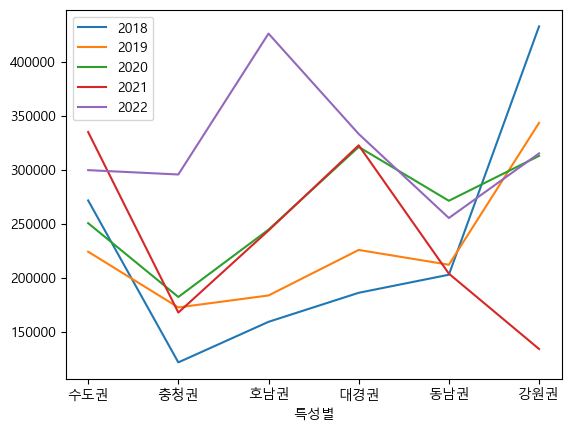

In [169]:
# x_list=['수도권', '충청권', '호남권', '대경권', '동남권', '강원권']
# df6_area.plot(["특성별"],["2018"])
# df6_area.plot(df6_area["특성별"],df6_area["2019"])
# df6_area.plot(df6_area["특성별"],df6_area["2020"])
# df6_area.plot(df6_area["특성별"],df6_area["2021"])
df6_area.set_index('특성별', inplace=True)
df6_area.plot()
# plt.xticks(x_list)
# plt.plot()
plt.show()

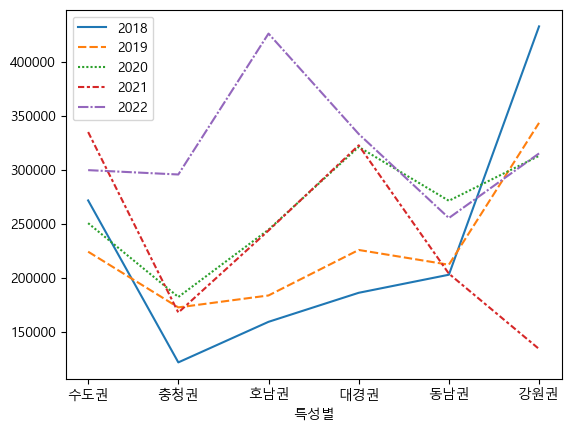

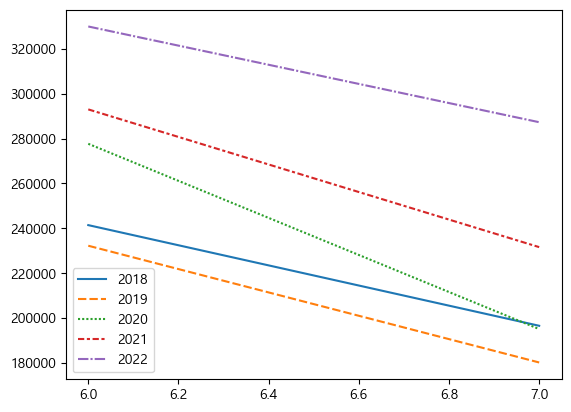

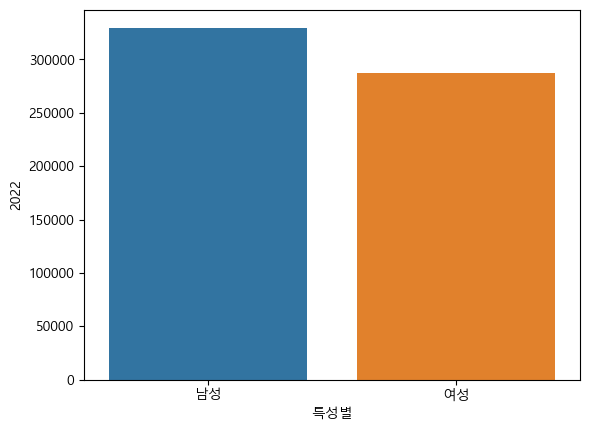

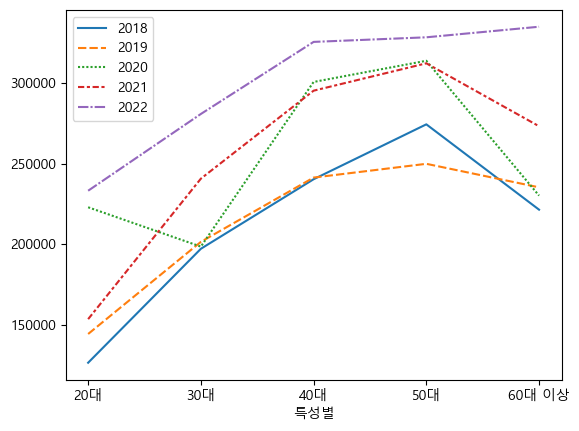

In [182]:
sns.lineplot(df6_area)
plt.show()
sns.lineplot(df6_sex)
plt.show()
sns.barplot(x="특성별",y="2018",data=df6_sex)
sns.barplot(x="특성별",y="2019",data=df6_sex)
sns.barplot(x="특성별",y="2020",data=df6_sex)
sns.barplot(x="특성별",y="2021",data=df6_sex)
sns.barplot(x="특성별",y="2022",data=df6_sex)
plt.show()
sns.lineplot(df6_age)
plt.show()

In [7]:
file_path = "./지출액_지역.xlsx"
df7 = pd.read_excel(file_path)
df7
file_path = "./지출액_성별.xlsx"
df8 = pd.read_excel(file_path)
df8
file_path = "./지출액_연령.xlsx"
df9 = pd.read_excel(file_path)
df9

,연도,연령,평균
0,2018,20대,126482
1,2018,30대,197163
2,2018,40대,240282
3,2018,50대,274338
4,2018,60대 이상,221412
5,2019,20대,144310
6,2019,30대,201449
7,2019,40대,241319
8,2019,50대,249858
9,2019,60대 이상,235269


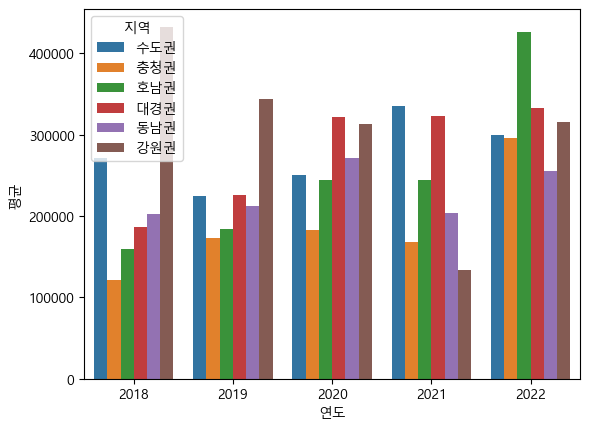

<Figure size 800x1400 with 0 Axes>

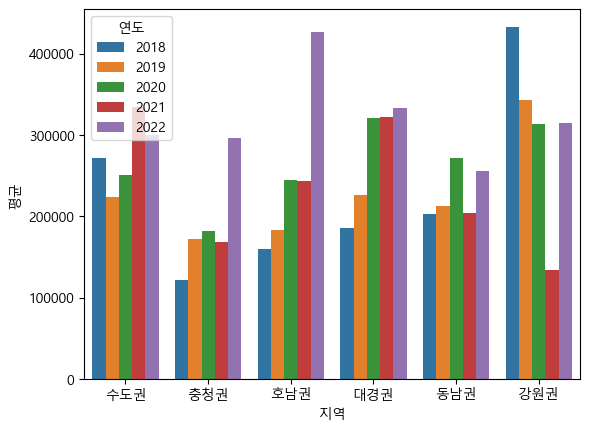

<Figure size 800x1400 with 0 Axes>

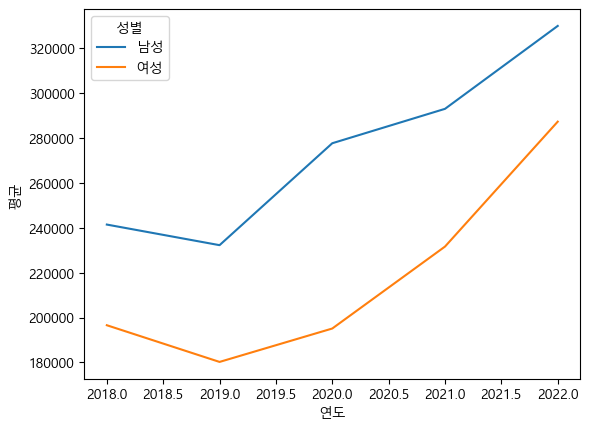

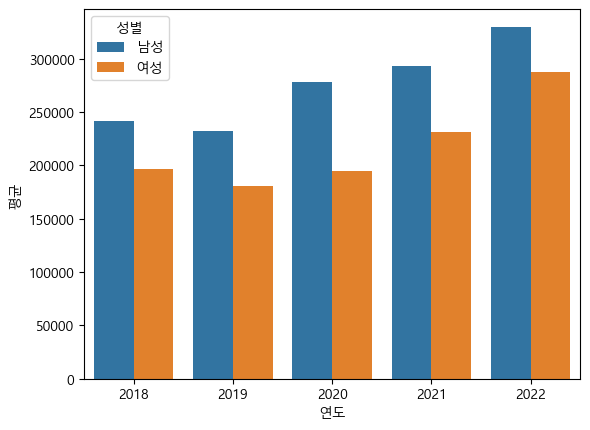

<Figure size 800x1400 with 0 Axes>

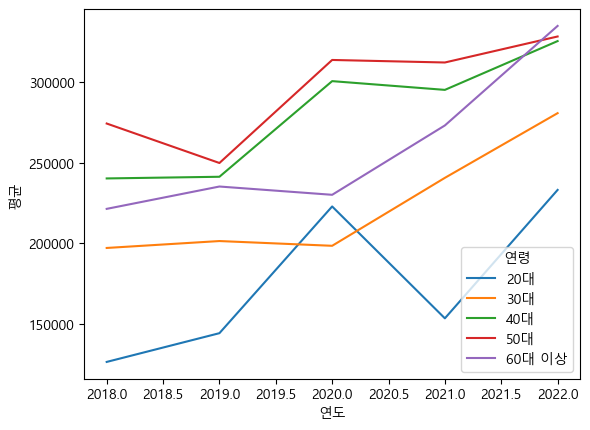

In [8]:
sns.barplot(x="연도",y="평균",hue="지역",data=df7)
plt.figure(figsize=(8,14))
plt.show()
sns.barplot(x="지역",y="평균",hue="연도",data=df7)
plt.figure(figsize=(8,14))
plt.show()


sns.lineplot(x="연도",y="평균",hue="성별",data=df8)
plt.show()
sns.barplot(x="연도",y="평균",hue="성별",data=df8)
plt.figure(figsize=(8,14))
plt.show()



sns.lineplot(x="연도",y="평균",hue="연령",data=df9)
plt.show()


In [10]:
file_path = "./지출액_지역1.xlsx"
df10 = pd.read_excel(file_path)
df10.rename(columns={df10.columns[0]:'연도'},inplace=True)

<Figure size 1000x1800 with 0 Axes>

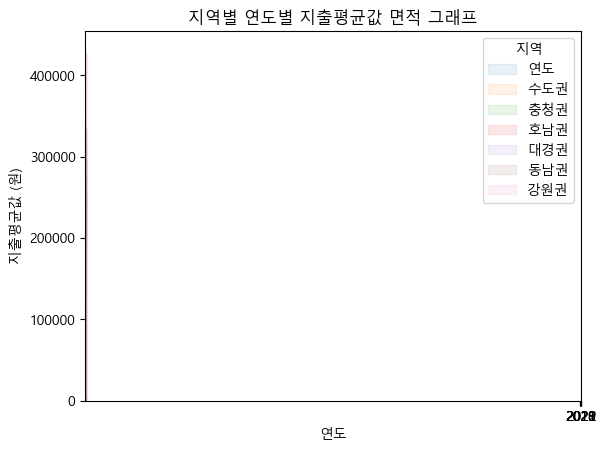

In [11]:
# df10.set_index('시점', inplace=True)
plt.figure(figsize=(10,18))
ax=df10.plot(kind='area', stacked=False, alpha=0.1)
plt.xlabel('연도')
plt.ylabel('지출평균값 (원)')
plt.title('지역별 연도별 지출평균값 면적 그래프')
plt.legend(title='지역')
plt.xticks([2018,2019,2020,2021,2022])
# plt.yticks([100000,400000,700000,1000000,1300000,1600000,1900000],['100K','400K','700K','1000K','1300K','1600K','1900K'])

plt.show()

In [12]:
fig = ply.Figure()

for col in df10.columns[1:]:
    fig.add_trace(ply.Scatter(x=df10['연도'], y=df10[col], mode='lines', name=col,text=[col]*len(df10)))

# 마우스 호버 팝업 효과 추가
fig.update_layout(hovermode='x unified')

fig.update_traces(hovertemplate='<br>연도: %{x}<br>지출평균액: %{y:,.0f}원<br>지역: %{text}')

fig.update_xaxes(title_text='연도')
fig.update_yaxes(title_text='지출평균액 (원)')

fig.update_layout(title='지역별 연도별 지출평균액 면적 그래프', legend_title_text='지역')

fig.show()

In [13]:
import plotly.express as px
fig = ply.Figure()

for col in df10.columns[1:]:
    fig.add_trace(ply.Scatter3d(x=df10['연도'], y=[col]*len(df10), z=df10[col], mode='markers', name=col))

fig.update_layout(scene=dict(xaxis_title='연도', yaxis_title='지역', zaxis_title='지출평균값'),
                  title='지역별 연도별 지출평균값 3D 산점도')

fig.show()

In [14]:
fig = ply.Figure()
colors = ['rgba(168, 166, 119, 0.9)', 'rgba(192, 192, 240, 0.7)', 'rgba(240, 198, 245, 0.5)',
         'rgba(119, 168, 128, 0.3)', 'rgba(186, 245, 197, 0.2)', 'rgba(240, 239, 180, 0.1)']
for i, col in enumerate(df10.columns[1:]):
    fig.add_trace(ply.Scatter(x=df10['연도'], y=df10[col], fill='tozeroy', mode='lines', name=col, line_color=colors[i]))

fig.update_layout(title='지역별 연도별 지출평균값 Area 그래프')

# x축 수정
fig.update_xaxes(title='연도', tickvals=[2018,2018.5, 2019, 2019.5, 2020, 2020.5, 2021,2021.5,2022],
                 ticktext=['18년','18년 6월','19년','19년 6월','20년','20년 6월','21년','21년6월','22년','22년 6월'])

fig.update_layout(title='지역별 연도별 지출평균값 Area 그래프')

fig.show()